[*********************100%%**********************]  503 of 503 completed


7 Failed downloads:
['KHC', 'TPR', 'BIO', 'EQT', 'VLTO', 'WEC', 'WDC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-11-21 00:00:00 -> 2023-11-19)')


<Axes: xlabel='date'>

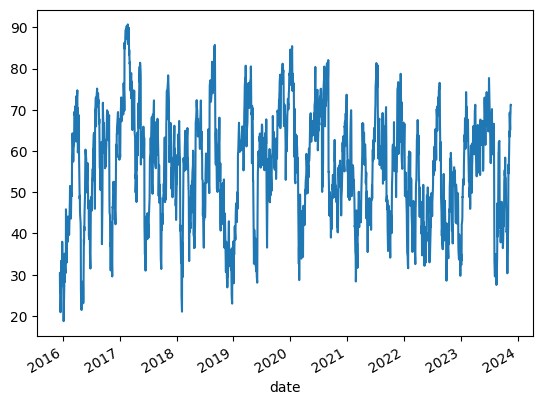

In [1]:
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import pandas_ta
import warnings
warnings.filterwarnings('ignore')


sp500 = pd.read_html ('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500['Symbol'] = sp500['Symbol'].str.replace('.','-')
symbols_list = sp500['Symbol'].unique().tolist()
# symbols_list
end_date = '2023-11-19'
start_date = pd.to_datetime(end_date)-pd.DateOffset(365*8)
df = yf.download(tickers=symbols_list, start=start_date, end=end_date).stack()
df.index.names = ['date','ticker']
#df
df.columns = df.columns.str.lower()
#df
df['garman_klass_vol'] = ((np.log(df['high'])-np.log(df['low']))**2)/2-(2*np.log(2)-1)*((np.log(df['adj close'])-np.log(df['open']))**2)
# garman klass volatility
# df
df['rsi'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.rsi(close=x, Length=20))
# df
# relative strength index
df.xs('AAPL', level=1)['rsi'].plot()
# rsi or relative strength index of Apple


